#Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Declare Functions

In [2]:
def jakes_trial_1(fd, Duration):
    M = 20       # number of frequencies
    N = 4 * M + 2   # inverse will give frequency resolution

    T = int(Duration / 0.001)   # no of samples

    # initializing variables
    z_r = np.zeros(T)
    z_i = np.zeros(T)

    phi_r = -np.pi + (2 * np.pi) * np.random.rand(M, 1)   # random phase angle real
    phi_i = -np.pi + (2 * np.pi) * np.random.rand(M, 1)   # random phase angle imag
    phi0 = -np.pi + (2 * np.pi) * np.random.rand(1, 1)    # random phase offset

    for t in range(T):
        for n in range(M):
            beta_n = np.pi * n / (M + 1)
            fn = fd * np.cos(2 * np.pi * n / N)
            z_r[t] = z_r[t] + np.cos(beta_n) * np.cos(2 * np.pi * fn * 0.001 * t + phi_r[n])
            z_i[t] = z_i[t] + np.cos(beta_n) * np.sin(2 * np.pi * fn * 0.001 * t + phi_i[n])
        z_r[t] = z_r[t] + np.sqrt(2) * np.cos(2 * np.pi * fd * t + phi0)

    z_r = (2 / np.sqrt(N)) * z_r  # In-phase part
    z_i = (2 / np.sqrt(N)) * z_i  # Quadrature part
    z = z_r + 1j * z_i  # Adding in-phase and quadrature parts
    r = np.abs(z)  # The received envelope

    return r

##Simulating Jakes Model

In [3]:

fd = 100  # Doppler frequency
Duration = 5  # Duration of simulation
tau = 0.001  # Time corresponding to a single
T = int(Duration / tau)  # No of samples
M = 100  # No of simulations
rhodB = [-22, -19, -16, -13, -10, -7, -3, -1, 2, 5]  # Threshold values

rho_dB = np.zeros((M, T))  # Normalized received envelope
for i in range(M):
    # Jakes_trial_1(fd, Duration) simulates a Rayleigh fading of Doppler frequency fd for a duration of Duration (seconds)
    v = jakes_trial_1(fd, Duration)
    v_dB = 20 * np.log10(v)
    v_rms = np.sqrt(np.mean(v**2))
    rho = v / v_rms  # Finding RMS of received envelope
    rho_dB[i, :] = 20 * np.log10(rho)  # Normalizing the envelope

rho_t = 10**(np.array(rhodB) / 20)  # Linear values of the thresholds
Nv = np.zeros((M, len(rhodB)))
tau_bar = np.zeros((M, len(rhodB)))
for i in range(M):  # running for every simulation
    for j in range(1, T):  # running for every point in Received envelope (Normalized)
        for k in range(len(rhodB)):  # for every threshold value
            if rho_dB[i, j - 1] < rhodB[k] and rho_dB[i, j] >= rhodB[k]:
                Nv[i, k] += 1  # Counting the number of crossings
            if rho_dB[i, j] <= rhodB[k]:
                tau_bar[i, k] += 1  # Counting the number of points under threshold

N_v_mean = np.mean(Nv, axis=0)
tau_mean = np.mean(tau_bar, axis=0)




In [9]:
# Averaging the observations over M simulations
LCR = (N_v_mean / fd) / Duration
AFD = (tau * tau_mean / Duration) / (rho_t * np.sqrt(2 * np.pi))

LCR_th = LCR.copy()  # Initializing theoretical values
AFD_th = np.zeros(len(rhodB))  # Initializing theoretical values
for k in range(len(rhodB)):
    LCR_th[k] = (np.sqrt(2 * np.pi) * rho_t[k]*fd * np.exp(-(rho_t[k] ** 2)))  # Calculating no theoretical LCR
    AFD_th[k] = (1-np.exp(-rho_t[k] * rho_t[k])) / (rho_t[k] * np.sqrt(2 * np.pi))  # Calculating theoretical fade durations



##Average fade durations

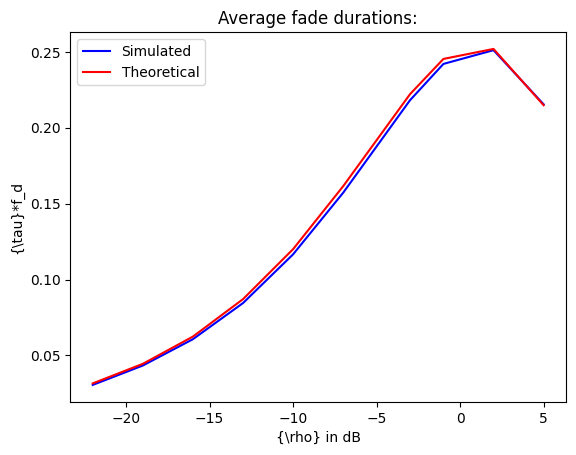

In [10]:
plt.figure()
plt.plot(rhodB, AFD, 'b', label='Simulated')
plt.plot(rhodB, AFD_th, 'r', label='Theoretical')
plt.title("Average fade durations:")
plt.legend()
plt.xlabel('{\\rho} in dB')
plt.ylabel('{\\tau}*f_d')
plt.show()

## Rician Fading

In [11]:
# ==================== Rician Fading ========================================
fd = 100
Duration = 1
t = np.arange(0, Duration, tau)

v = jakes_trial_1(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)


### For K = 1

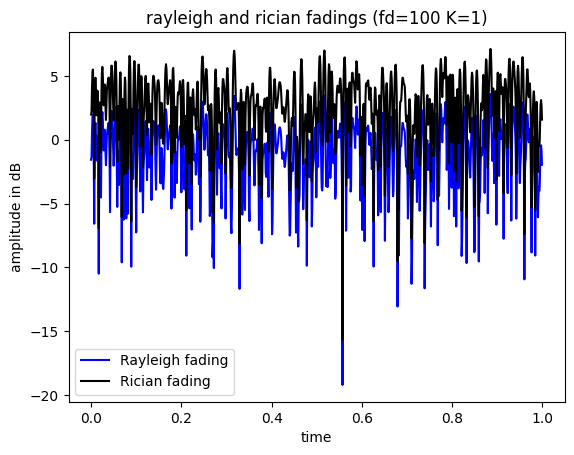

In [12]:

# ----------------------- K = 1 -------------------------------------------
K = 1
los1 = rho1 * 10**(K / 10)
z1 = los1 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z1), 'k', label='Rician fading')
plt.title('rayleigh and rician fadings (fd=100 K=1)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()



### For K = 4

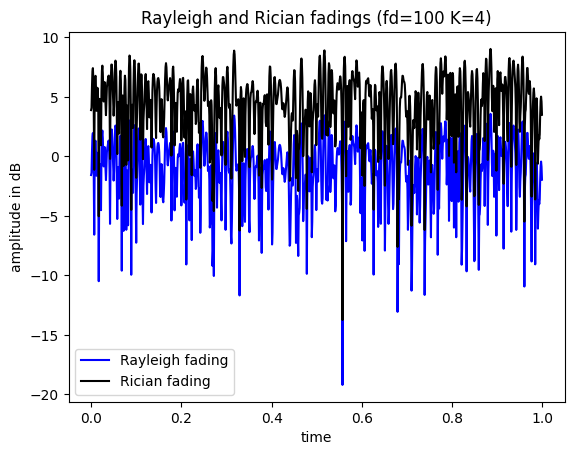

In [13]:

# ----------------------- K = 4 -------------------------------------------
K = 4
los2 = rho1 * 10**(K / 10)
z2 = los2 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z2), 'k', label='Rician fading')
plt.title('Rayleigh and Rician fadings (fd=100 K=4)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()

### For K = 10

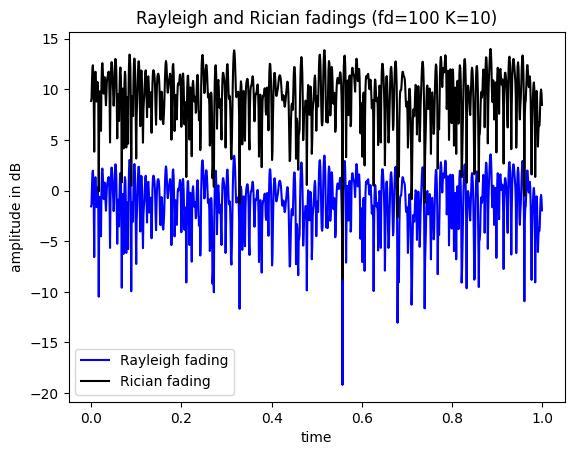

In [14]:
# ----------------------- K = 10 ------------------------------------------
K = 10
los3 = rho1 * 10**(K / 10)
z3 = los3 + rho1

plt.figure()
plt.plot(t, rho1_db, 'b', label='Rayleigh fading')
plt.plot(t, 10 * np.log10(z3), 'k', label='Rician fading')
plt.title('Rayleigh and Rician fadings (fd=100 K=10)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.legend()
plt.show()

##Received envelopes

###for 1Hz of Doppler Frequency

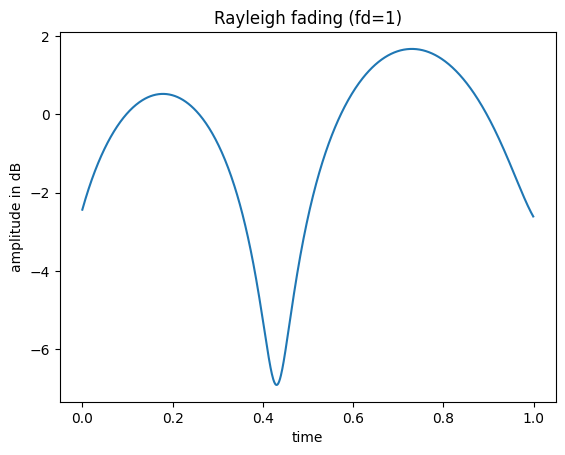

In [15]:
# ===========================   ===========================

# Plotting for 1Hz of Doppler Frequency
fd = 1
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_trial_1(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=1)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()


###for 10Hz of Doppler Frequency

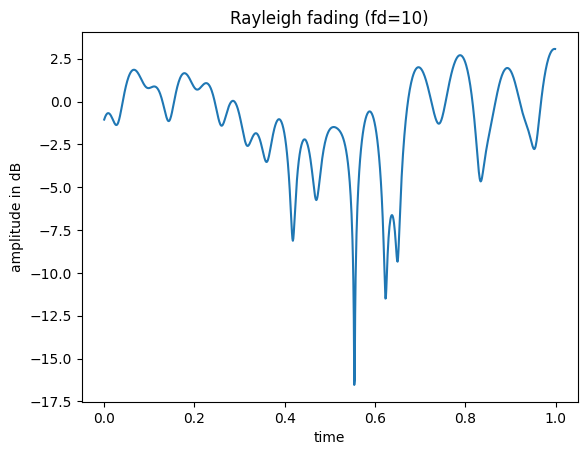

In [16]:
# Plotting for 10 Hz of Doppler Frequency
fd = 10
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_trial_1(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=10)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()


###for 100Hz of Doppler Frequency

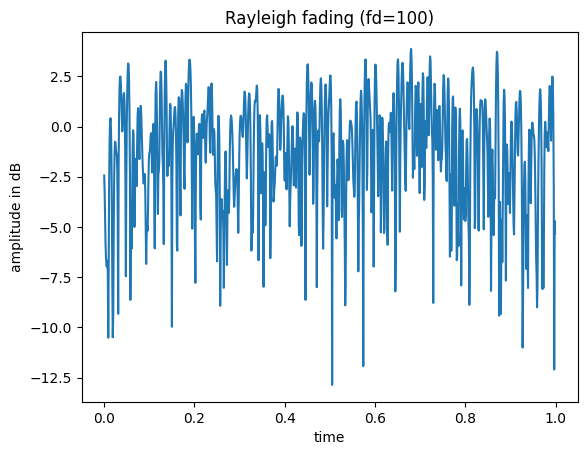

In [17]:

# Plotting for 100 Hz of Doppler Frequency
fd = 100
Duration = 1
t = np.arange(0, Duration, tau)
v = jakes_trial_1(fd, Duration)
v_rms = np.sqrt(np.mean(v**2))
rho1 = v / v_rms
rho1_db = 10 * np.log10(rho1)

plt.figure()
plt.plot(t, rho1_db)
plt.title('Rayleigh fading (fd=100)')
plt.xlabel('time')
plt.ylabel('amplitude in dB')
plt.show()
